<a href="https://colab.research.google.com/github/JakeOh/20230228_itwill_java140_lab_python/blob/main/ml02_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

*  import module_name [as alias]
*  from module_name import class_name, function_name, ...


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn 패키지: 머신 러닝 알고리즘을 구현한 패키지.
from sklearn.neighbors import KNeighborsClassifier  # 클래스
from sklearn.model_selection import train_test_split  # 함수


# 데이터셋 준비

수산시장(fish market) 데이터 셋. 물고기 종류(어종)과 물고기의 여러가지 특성들(길이, 무게, 대각선 길이, ...)이 정리된 CSV 파일.

In [3]:
# CSV 파일 경로
fish_csv = 'https://github.com/JakeOh/20230228_itwill_java140_lab_python/raw/main/fish.csv'

In [4]:
# CSV 파일을 읽어서 DataFrame을 생성
fish_df = pd.read_csv(fish_csv)

In [5]:
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [6]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


# 데이터 탐색(EDA: Exploratory Data Analysis)

## 카테고리 타입 변수 탐색

In [7]:
fish_df.Species.unique()  # 중복되지 않는 값

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [10]:
species_count = fish_df.Species.value_counts()
species_count

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

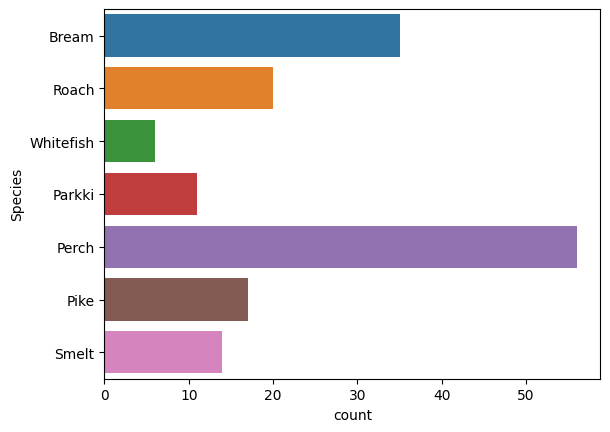

In [9]:
sns.countplot(data=fish_df, y='Species')
plt.show()

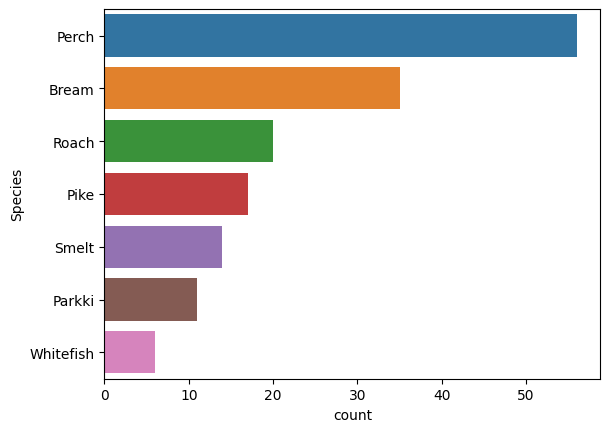

In [11]:
sns.countplot(data=fish_df, y='Species',
              order=species_count.index)
plt.show()

## 숫자 타입 변수 탐색

In [12]:
fish_df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


1x5 subplots을 생성하고, 숫자타입 변수(컬럼) 5개의 히스토그램을 그리세요.

In [17]:
variables = fish_df.columns[1:]  # 숫자 타입 컬럼(변수)들의 이름
variables

Index(['Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

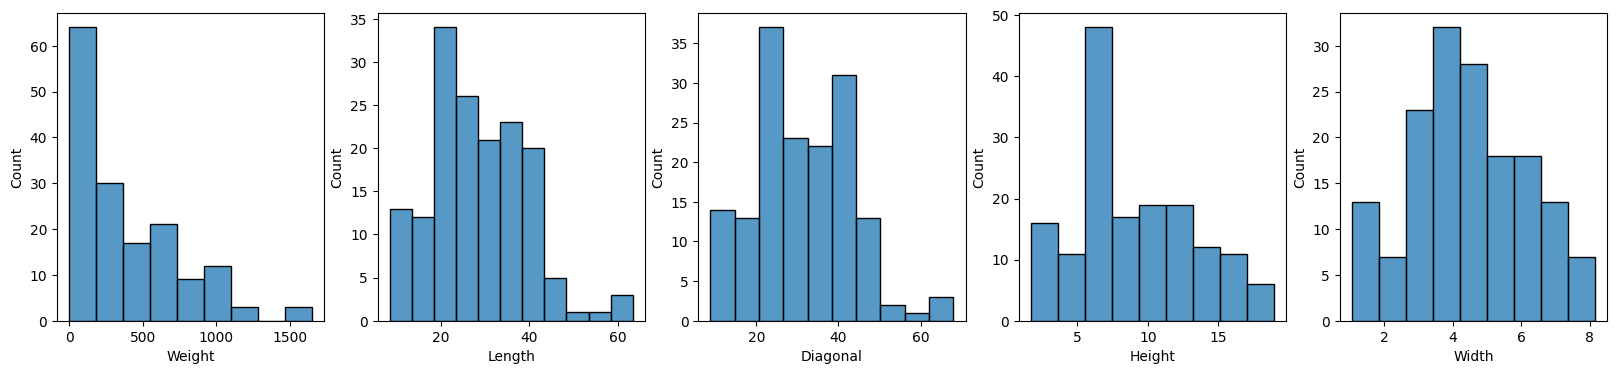

In [19]:
fig, ax = plt.subplots(ncols=5, figsize=(20,))

for i, v in enumerate(variables):
    sns.histplot(data=fish_df, x=v, ax=ax[i])

plt.show()

1x5 subplots을 생성하고, 숫자타입 변수들의 box plot을 그리세요.

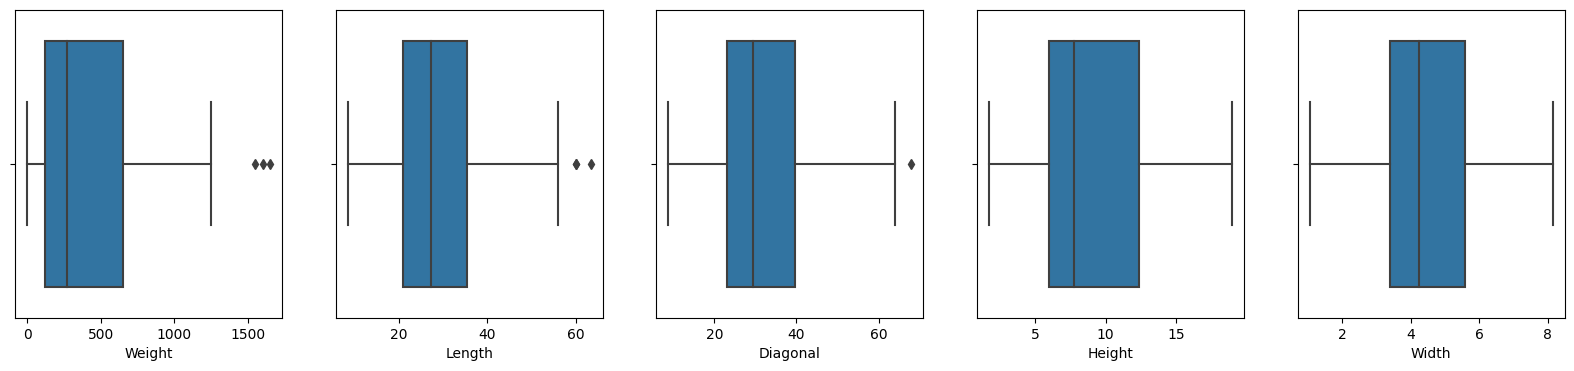

In [21]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 4))

for i, v in enumerate(variables):
    sns.boxplot(data=fish_df, x=v, ax=ax[i])

plt.show()